 SALES ANALYSIS  

 Case study 1: SuperStore Sales Analysis

IMPORTING REQUIRED LIBRARIES

LOADING THE DATASET

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("train.csv")
# Display the DataFrame
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
# Exploring Data
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [7]:
df['Segment'].value_counts()

Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64

In [8]:
df['Sub-Category'].value_counts()

Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64

Exploratory Data Analysis

In [9]:
!pip install plotly


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Initialize Plotly in Jupyter Notebook mode
import plotly.io as pio
pio.renderers.default = 'notebook_connected'


# Create a mapping for all 50 states 
all_state_mapping = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR",
    "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE",
    "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL",
    "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
    "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN",
    "Mississippi": "MS", "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV",
    "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY",
    "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}

# Add the Abbreviation column to the DataFrame
df['Abbreviation'] = df['State'].map(all_state_mapping)

# Group by state and calculate the sum of sales
sum_of_sales = df.groupby('State')['Sales'].sum().reset_index()

# Add Abbreviation to sum_of_sales
sum_of_sales['Abbreviation'] = sum_of_sales['State'].map(all_state_mapping)

# Create a choropleth map using Plotly
fig = go.Figure(data=go.Choropleth(
    locations=sum_of_sales['Abbreviation'],
    locationmode='USA-states',
    z=sum_of_sales['Sales'],
    hoverinfo='location+z',
     showscale=True
))

fig.update_geos(projection_type="albers usa")
fig.update_layout(
    geo_scope='usa',
    title='Total Sales by U.S. State'
)

fig.show()

In [13]:
# Groupping by Category and sub_category
df_summary = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
df_summary

,Category,Sub-Category,Sales
0,Furniture,Bookcases,113813.1987
1,Furniture,Chairs,322822.7310
2,Furniture,Furnishings,89212.0180
3,Furniture,Tables,202810.6280
4,Office Supplies,Appliances,104618.4030
5,Office Supplies,Art,26705.4100
6,Office Supplies,Binders,200028.7850
7,Office Supplies,Envelopes,16128.0460
8,Office Supplies,Fasteners,3001.9600
9,Office Supplies,Labels,12347.7260


In [15]:
import plotly.express as px

# Sample data
df_summary = pd.DataFrame({
    'Category': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Sub-Category': ['A1', 'A2', 'B1', 'B2', 'C1', 'C2'],
    'Sales': [100, 150, 200, 250, 300, 350]
})

# Create a nested pie chart (sunburst chart)
fig = px.sunburst(
    df_summary,
    path=['Category', 'Sub-Category'],
    values='Sales',
)

fig.show()


In [16]:
import plotly.express as px

# Create a nested pie chart
fig = px.sunburst(
    df_summary,
    path=['Category', 'Sub-Category'],
    values='Sales',
)

fig.show()

describe the Sales ?

c:\Users\dubey\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Sales', ylabel='Density'>

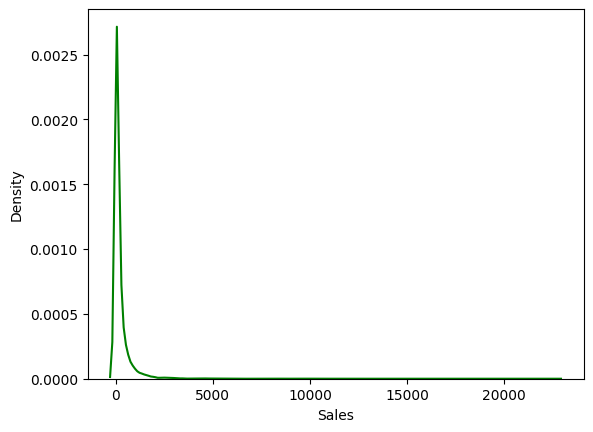

In [20]:
sns.kdeplot(data=df,x="Sales",color="green")

Correlation of Features

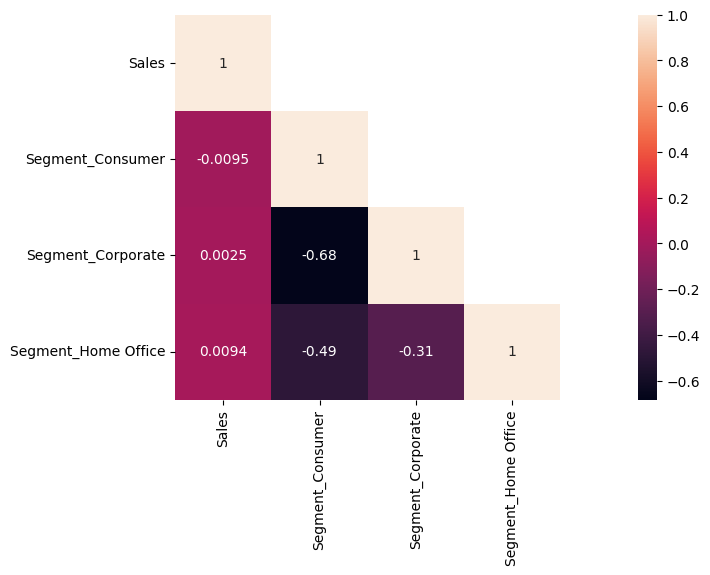

In [18]:
df1 = df[['Segment','Sales']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True);

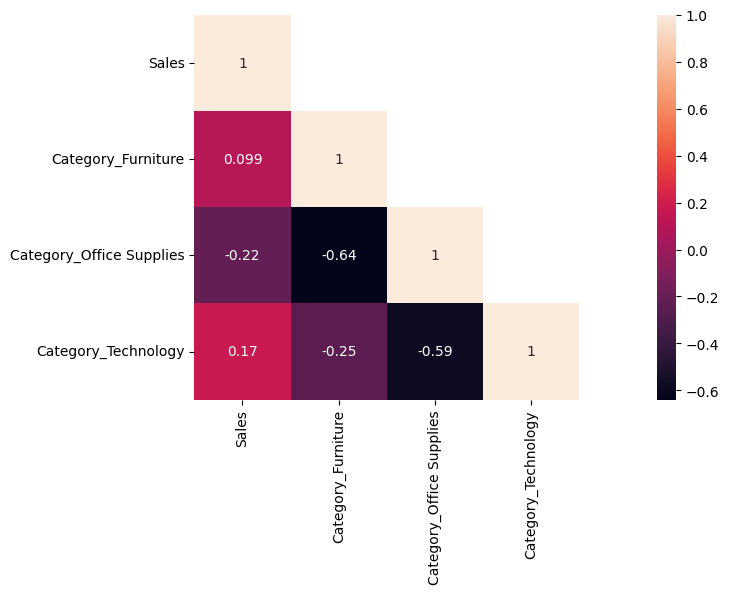

In [21]:
df1 = df[['Category','Sales']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
mask

fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data = cor_mat, square = True,mask=mask, annot = True, cbar = True);

the most common ctegory in every city which help in markting in the common product for each city

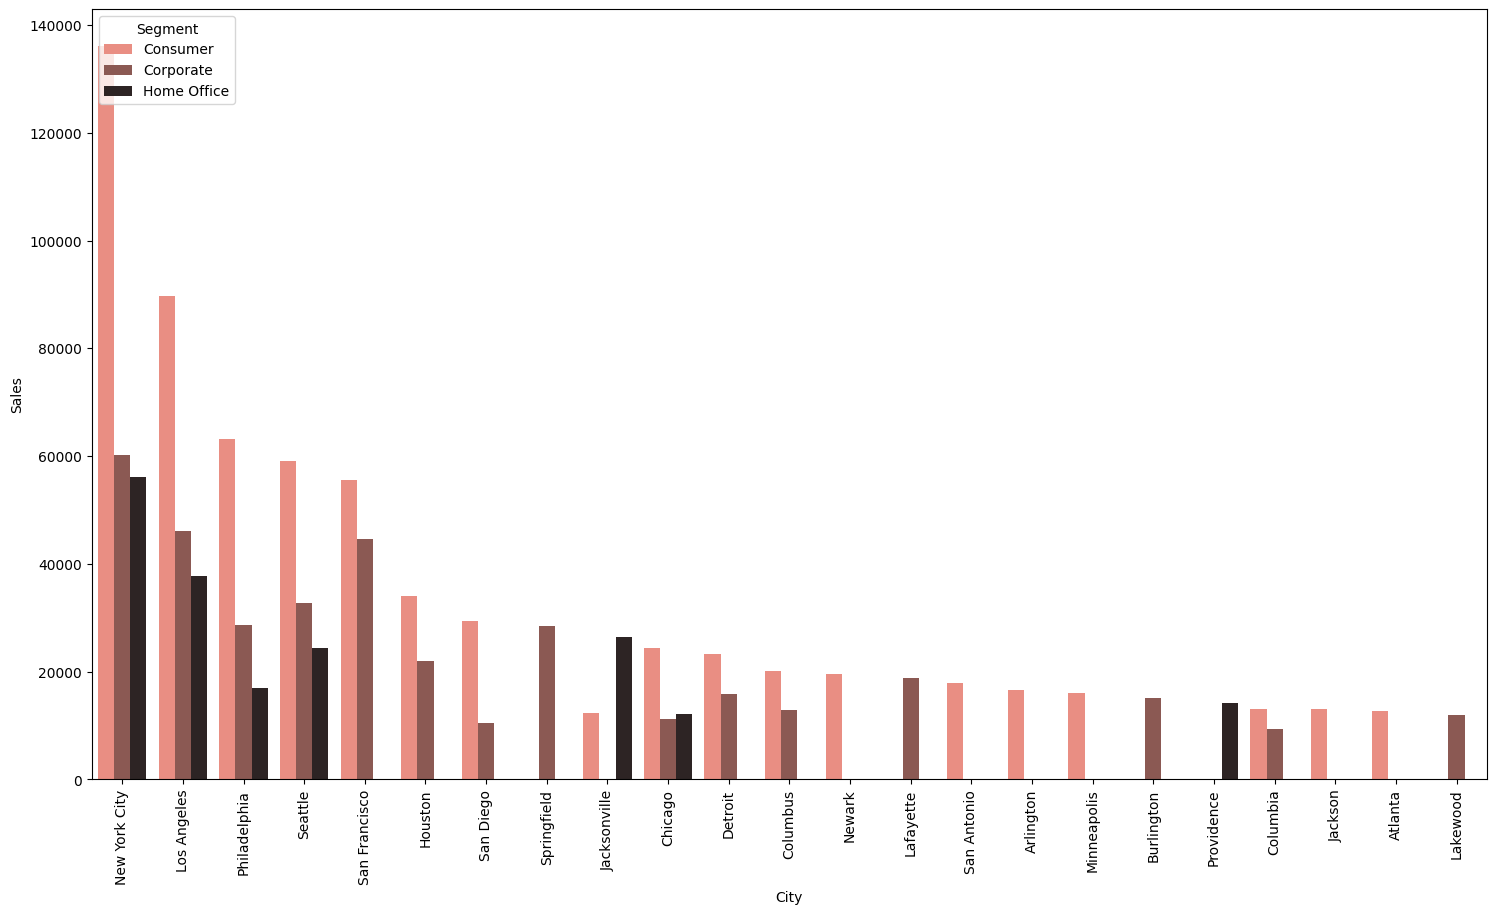

In [23]:
plt.figure(figsize=(18,10))
top_cities= df.groupby(["City","Segment"]).sum().sort_values("Sales",ascending=False).head(40)
top_cities= top_cities[['Sales']].round(2)
top_cities.reset_index(inplace=True)
sns.barplot(x='City',y='Sales',hue='Segment',data=top_cities,palette='dark:salmon_r')
plt.xticks(rotation='vertical')
plt.show()

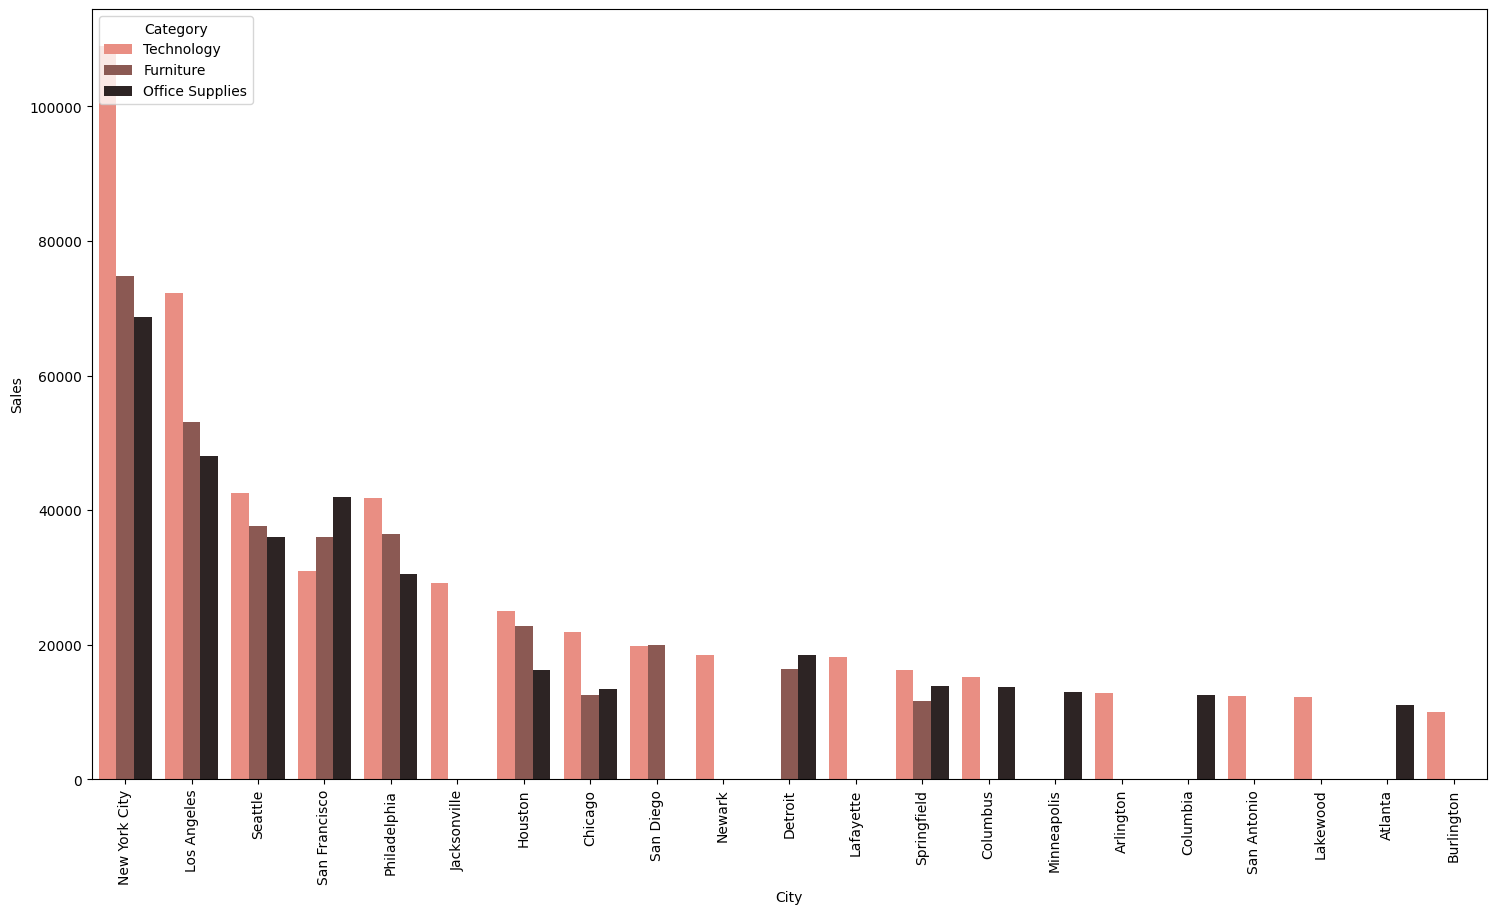

In [24]:
plt.figure(figsize=(18,10))
top_cities= df.groupby(["City","Category"]).sum().sort_values("Sales",ascending=False).head(40)
top_cities= top_cities[['Sales']].round(2)
top_cities.reset_index(inplace=True)
sns.barplot(x='City',y='Sales',hue='Category',data=top_cities,palette='dark:salmon_r')
plt.xticks(rotation='vertical')
plt.show()

Data visualization & getting conclusions

In [25]:
top_cities= df.groupby("City").sum().sort_values("Sales",ascending=False).head(15)
top_cities= top_cities[['Sales']].round(2)
top_cities.reset_index(inplace=True)
top_cities

fig=px.bar(top_cities,x='City',y='Sales',title="Top 15 Cities",color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

Performing Feature Engineering¶

In [26]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')   
df['order_day'] = df['Order Date'].dt.day
df['ship_day'] = df['Ship Date'].dt.day
df['order_year'] = df['Order Date'].dt.year
df['ship_year'] = df['Ship Date'].dt.year
df['Fulfillment_Time'] = df['Ship Date'] - df['Order Date']
df['Fulfillment_Time'] = df['Fulfillment_Time'].dt.days

In [27]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Abbreviation,order_day,ship_day,order_year,ship_year,Fulfillment_Time
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,KY,8,11,2017,2017,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,KY,8,11,2017,2017,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,CA,12,16,2017,2017,4
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,FL,11,18,2016,2016,7
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,FL,11,18,2016,2016,7


Performing Category and Product level analysis

In [28]:
prod = df[['Category', 'Sub-Category', 'Product Name', 'Sales', 'order_year']]

fig = px.sunburst(
    prod, path=["Category", "Sub-Category"], values="Sales",
    color="Category",
    title="Sales Breakdown by Category and Subcategory",
    width = 1000,
    height = 600
)

fig.show()

In [31]:
from plotly.express import bar

In [32]:
cat_sales = prod.groupby(['Category', 'order_year'])['Sales'].sum()

fig = bar(cat_sales.reset_index(), x='Category', y='Sales', color = 'order_year', title='YOY Sales by Category')
fig.update_layout(xaxis_title='Category', yaxis_title='Total Sales')

Performing Customer and Region level analysis

In [34]:
cust = df[['Customer ID', 'Segment', 'Ship Mode', 'State', 'Sales', 'order_year', 'Order Date']]

c:\Users\dubey\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



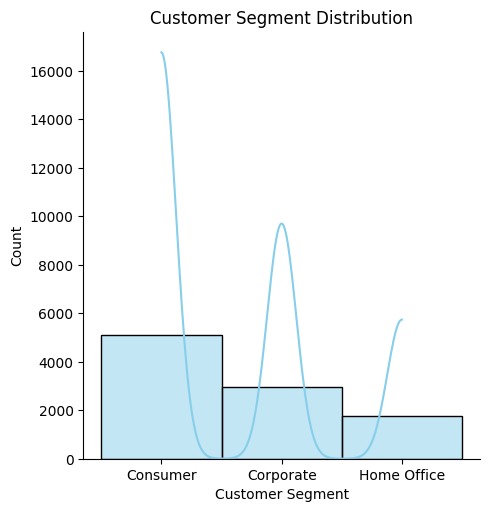

In [35]:
sns.displot(cust['Segment'], kind="hist", kde=True, color="skyblue")
plt.xlabel("Customer Segment")
plt.ylabel("Count")
plt.title("Customer Segment Distribution")
plt.show()

In [36]:
cust['latest_order_year'] = cust.groupby('Customer ID')['order_year'].transform('max')

cust['churn'] = (cust['order_year'] != cust['latest_order_year'])
churn_rate = cust[cust['churn'] == True].shape[0] / len(cust)
pct = churn_rate * 100

print(f"Churn Rate: {pct:.2f} % ")


Churn Rate: 62.56 % 


C:\Users\dubey\AppData\Local\Temp\ipykernel_12984\1579789547.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dubey\AppData\Local\Temp\ipykernel_12984\1579789547.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
## Revenue per user

total_revenue = cust['Sales'].sum()
total_customers = len(cust['Sales'].unique())
RPU = total_revenue / total_customers
print(RPU)

392.8325139308668


In [39]:
cust['AOV'] = cust.groupby('Customer ID')['Sales'].transform('mean')
cust['Purchase_Frequency'] = cust.groupby('Customer ID')['Order Date'].transform('count')

cust['CLTV'] = cust['AOV'] * cust['Purchase_Frequency'] * 2  ## Assuming customer is loyal to the store for 2 years

cust.head(15)

C:\Users\dubey\AppData\Local\Temp\ipykernel_12984\3486032786.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dubey\AppData\Local\Temp\ipykernel_12984\3486032786.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dubey\AppData\Local\Temp\ipykernel_12984\3486032786.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,Customer ID,Segment,Ship Mode,State,Sales,order_year,Order Date,latest_order_year,churn,AOV,Purchase_Frequency,CLTV
0,CG-12520,Consumer,Second Class,Kentucky,261.9600,2017,2017-11-08,2018,True,229.756000,5,2297.560
1,CG-12520,Consumer,Second Class,Kentucky,731.9400,2017,2017-11-08,2018,True,229.756000,5,2297.560
2,DV-13045,Corporate,Second Class,California,14.6200,2017,2017-06-12,2018,True,124.387000,9,2238.966
3,SO-20335,Consumer,Standard Class,Florida,957.5775,2016,2016-10-11,2018,True,173.505033,15,5205.151
4,SO-20335,Consumer,Standard Class,Florida,22.3680,2016,2016-10-11,2018,True,173.505033,15,5205.151
5,BH-11710,Consumer,Standard Class,California,48.8600,2015,2015-06-09,2018,True,260.639625,24,12510.702
6,BH-11710,Consumer,Standard Class,California,7.2800,2015,2015-06-09,2018,True,260.639625,24,12510.702
7,BH-11710,Consumer,Standard Class,California,907.1520,2015,2015-06-09,2018,True,260.639625,24,12510.702
8,BH-11710,Consumer,Standard Class,California,18.5040,2015,2015-06-09,2018,True,260.639625,24,12510.702
9,BH-11710,Consumer,Standard Class,California,114.9000,2015,2015-06-09,2018,True,260.639625,24,12510.702


Summary¶


We can clearly see that the "Technology" category is the most popular one accross all three and has highest sales over all the years even though it just has 2 sub-categories present.

Contrary to that, "office supplies" has the highest number of Sub-categories but is still has the lowest sales
Considering our new feature "Fulfillment_Time", we can see that 2018 was the best year as most of the products were shipped fastest in that year.

"Technology" and "Furniture" had a great order delivery speed as well
We can see that the Standard shipping mode is favored by most of the customers instead of first class or same day delivery. This means we can focus on targeted promotions and monitor customer behavior to analyze the reasoning behind this method selection like cost sensitivity, product urgency, region dispersion.